# Project III | Deep Learning: Image Classification using CNN and Transfer Learning

## Task Description

In this project, students will first build a Convolutional Neural Network (CNN) model from scratch to classify images from a given dataset into predefined categories. Then, they will implement a transfer learning approach using a pre-trained model. Finally, students will compare the performance of the custom CNN and the transfer learning model based on evaluation metrics and analysis.

## Dataset

The dataset for this task is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

## Assessment Components

### Data Preprocessing

Data loading and preprocessing (e.g., normalization, resizing, augmentation).
Create visualizations of some images, and labels.

In [14]:
# Libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Rescaling
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.mixed_precision import set_global_policy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [15]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (50000, 32, 32, 3) (50000, 1)
Test data shape: (10000, 32, 32, 3) (10000, 1)


In [16]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u} ({class_names[u]}): {c} samples")

Class 0 (airplane): 5000 samples
Class 1 (automobile): 5000 samples
Class 2 (bird): 5000 samples
Class 3 (cat): 5000 samples
Class 4 (deer): 5000 samples
Class 5 (dog): 5000 samples
Class 6 (frog): 5000 samples
Class 7 (horse): 5000 samples
Class 8 (ship): 5000 samples
Class 9 (truck): 5000 samples


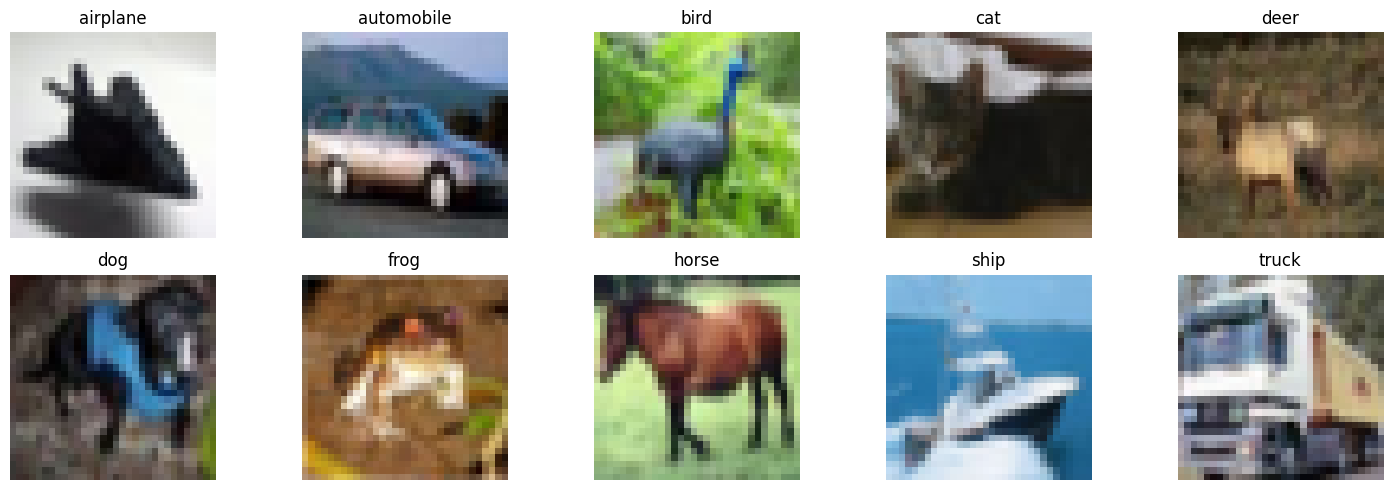

In [ ]:
plt.figure(figsize=(15, 5))

for class_idx in range(10):
    # Get the indices of images belonging to the current class
    indices = np.where(y_train == class_idx)[0]
    # Select the first image of this class
    img_idx = indices[0]

    plt.subplot(2, 5, class_idx + 1)
    plt.imshow(X_train[img_idx])
    plt.title(class_names[class_idx])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [17]:
# Reshape to add channel dimension
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Create a preprocessing layer for normalization
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)

In [5]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train)

### Model Architecture and Training

Design a CNN architecture suitable for image classification.
Include convolutional layers, pooling layers, and fully connected layers.

#### First model

In [ ]:
model_1 = Sequential([
    # 1st convolutional layer + normalization + pooling
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # 2nd convolutional layer + normalization + pooling
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # 3rd convolutional layer + normalization + pooling
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),  # helps prevent overfitting

    Dense(256, activation='relu'),
    Dropout(0.5),  # dropout after the dense layer as well

    Dense(10, activation='softmax')  # output for 10 classes
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_1 = model_1.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=60,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.3506 - loss: 1.8132 - val_accuracy: 0.5034 - val_loss: 1.3892
Epoch 2/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4570 - loss: 1.4995 - val_accuracy: 0.5326 - val_loss: 1.2965
Epoch 3/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5192 - loss: 1.3578 - val_accuracy: 0.6208 - val_loss: 1.0813
Epoch 4/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5504 - loss: 1.2733 - val_accuracy: 0.5384 - val_loss: 1.3815
Epoch 5/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5830 - loss: 1.1900 - val_accuracy: 0.6294 - val_loss: 1.0908
Epoch 6/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5995 - loss: 1.1523 - val_accuracy: 0.6775 - val_loss: 0.9484
Epoch 7/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6196 - loss: 1.0966 - val_accuracy: 0.6770 - val_loss: 0.9109
Epoch 8/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6331 -

#### Second model

In [ ]:

model_2 = Sequential([
    # Conv block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Conv block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Conv block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Conv block 4
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Global average pooling
    GlobalAveragePooling2D(),
    Dropout(0.5),

    # Dense layer
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    # Output layer
    Dense(10, activation='softmax')
])


model_2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)


history_2 = model_2.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_reduce]
)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.3839 - loss: 2.2303 - val_accuracy: 0.4903 - val_loss: 1.8222 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5277 - loss: 1.7113 - val_accuracy: 0.5188 - val_loss: 1.8201 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.5892 - loss: 1.5086 - val_accuracy: 0.5085 - val_loss: 2.0876 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6329 - loss: 1.3951 - val_accuracy: 0.5717 - val_loss: 1.7227 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6586 - loss: 1.3384 - val_accuracy: 0.6618 - val_loss: 1.3555 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.6783 - loss: 1.2961 - val_accuracy: 0.7072 - val_loss: 1.2134 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6915 - l

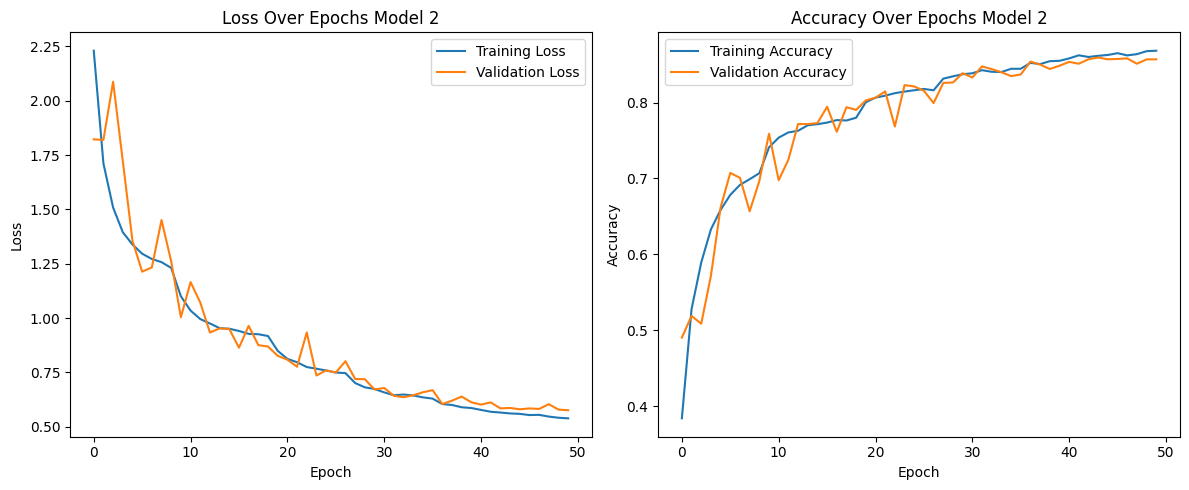

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs Model 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Model Evaluation

Evaluate the trained model on a separate validation set.
Compute and report metrics such as accuracy, precision, recall, and F1-score.
Visualize the confusion matrix to understand model performance across different classes.

#### First model

In [ ]:
# Predict class probabilities
y_pred_probs_1_test = model_1.predict(X_test)
y_pred_probs_1_train = model_1.predict(X_train)

# Convert probabilities to class predictions
y_pred_1_test = y_pred_probs_1_test.argmax(axis=1)
y_pred_1_train = y_pred_probs_1_train.argmax(axis=1)
y_true_test = y_test  # original integer labels
y_true_train=y_train

# Compute metrics
acc_1_test = accuracy_score(y_true_test, y_pred_1_test)
prec_1_test = precision_score(y_true_test, y_pred_1_test, average='weighted')
rec_1_test = recall_score(y_true_test, y_pred_1_test, average='weighted')
f1_1_test = f1_score(y_true_test, y_pred_1_test, average='weighted')

acc_1_train = accuracy_score(y_true_train, y_pred_1_train)
prec_1_train = precision_score(y_true_train, y_pred_1_train, average='weighted')
rec_1_train = recall_score(y_true_train, y_pred_1_train, average='weighted')
f1_1_train = f1_score(y_true_train, y_pred_1_train, average='weighted')

print('Evaluation predicting with X_test')
print(f"Accuracy: {acc_1_test:.4f}")
print(f"Precision: {prec_1_test:.4f}")
print(f"Recall: {rec_1_test:.4f}")
print(f"F1 Score: {f1_1_test:.4f}")

print('\nEvaluation predicting with X_train')
print(f"Accuracy: {acc_1_train:.4f}")
print(f"Precision: {prec_1_train:.4f}")
print(f"Recall: {rec_1_train:.4f}")
print(f"F1 Score: {f1_1_train:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Evaluation predicting with X_test
Accuracy: 0.8063
Precision: 0.8057
Recall: 0.8063
F1 Score: 0.8028

Evaluation predicting with X_train
Accuracy: 0.8314
Precision: 0.8316
Recall: 0.8314
F1 Score: 0.8287


In [ ]:
report_1_test = classification_report(y_true_test, y_pred_1_test, target_names=class_names)
print(report_1_test)

              precision    recall  f1-score   support

    airplane       0.78      0.88      0.83      1000
  automobile       0.85      0.96      0.90      1000
        bird       0.78      0.71      0.74      1000
         cat       0.70      0.56      0.62      1000
        deer       0.84      0.72      0.78      1000
         dog       0.77      0.70      0.73      1000
        frog       0.79      0.90      0.84      1000
       horse       0.76      0.89      0.82      1000
        ship       0.92      0.87      0.89      1000
       truck       0.87      0.87      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


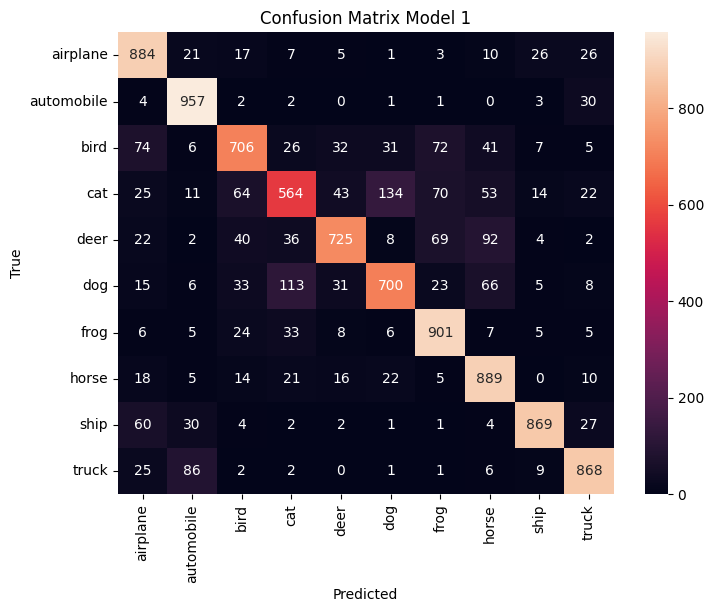

In [ ]:
# Predict & confusion matrix
y_pred_1 = model_1.predict(X_test).argmax(axis=1)
cm_1 = confusion_matrix(y_test, y_pred_1)

plt.figure(figsize=(8,6))
sns.heatmap(cm_1, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Model 1')
plt.show()

#### Second model

In [ ]:
# Predict class probabilities
y_pred_probs_2_test = model_2.predict(X_test)
y_pred_probs_2_train = model_2.predict(X_train)

# Convert probabilities to class predictions
y_pred_2_test = y_pred_probs_2_test.argmax(axis=1)
y_pred_2_train = y_pred_probs_2_train.argmax(axis=1)
y_true_test = y_test  # original integer labels
y_true_train = y_train

# Compute metrics
acc_2_test = accuracy_score(y_true_test, y_pred_2_test)
prec_2_test = precision_score(y_true_test, y_pred_2_test, average='weighted')
rec_2_test = recall_score(y_true_test, y_pred_2_test, average='weighted')
f1_2_test = f1_score(y_true_test, y_pred_2_test, average='weighted')

acc_2_train = accuracy_score(y_true_train, y_pred_2_train)
prec_2_train = precision_score(y_true_train, y_pred_2_train, average='weighted')
rec_2_train = recall_score(y_true_train, y_pred_2_train, average='weighted')
f1_2_train = f1_score(y_true_train, y_pred_2_train, average='weighted')

print('Evaluation predicting with X_test')
print(f"Accuracy: {acc_2_test:.4f}")
print(f"Precision: {prec_2_test:.4f}")
print(f"Recall: {rec_2_test:.4f}")
print(f"F1 Score: {f1_2_test:.4f}")

print('\nEvaluation predicting with X_train')
print(f"Accuracy: {acc_2_train:.4f}")
print(f"Precision: {prec_2_train:.4f}")
print(f"Recall: {rec_2_train:.4f}")
print(f"F1 Score: {f1_2_train:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
Evaluation predicting with X_test
Accuracy: 0.8569
Precision: 0.8572
Recall: 0.8569
F1 Score: 0.8549

Evaluation predicting with X_train
Accuracy: 0.9035
Precision: 0.9041
Recall: 0.9035
F1 Score: 0.9024


In [ ]:
report_2_test = classification_report(y_true_test, y_pred_2_test, target_names=class_names)
print(report_2_test)

              precision    recall  f1-score   support

    airplane       0.88      0.88      0.88      1000
  automobile       0.89      0.95      0.92      1000
        bird       0.82      0.79      0.80      1000
         cat       0.80      0.65      0.72      1000
        deer       0.85      0.82      0.83      1000
         dog       0.85      0.77      0.81      1000
        frog       0.78      0.95      0.86      1000
       horse       0.87      0.91      0.89      1000
        ship       0.94      0.92      0.93      1000
       truck       0.88      0.93      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


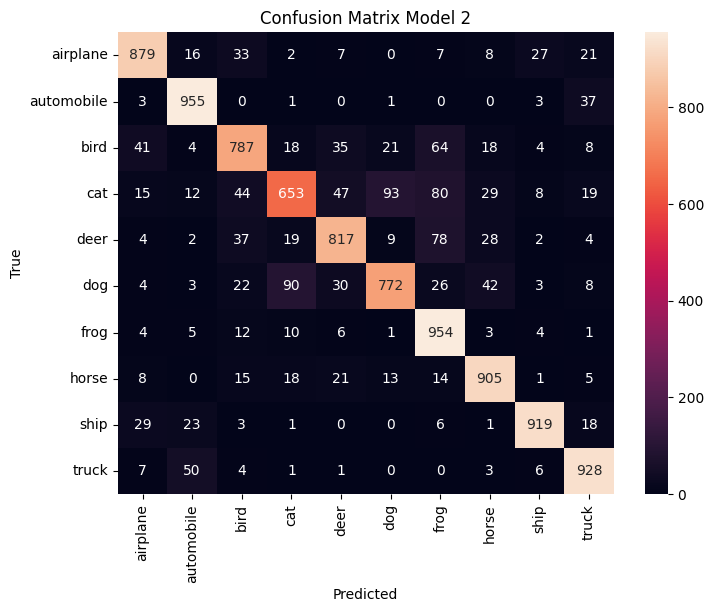

In [ ]:
# Predict & confusion matrix
y_pred_2 = model_2.predict(X_test).argmax(axis=1)
cm_2 = confusion_matrix(y_test, y_pred_2)

plt.figure(figsize=(8,6))
sns.heatmap(cm_2, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Model 2')
plt.show()

### Transfer Learning

Perform transfer learning with your chosen pre-trained models i.e., you will probably try a few and choose the best one (e.g., VGG16, Inception, ResNet trained on ImageNet)

Train and evaluate the transfer learning model.

Compare its performance against your custom CNN.

Discuss advantages and trade-offs of using transfer learning over building a model from scratch.

#### MobileNetV2

##### Freezing all convolutional layers

In [18]:
# Enable mixed precision (optional, speeds up training on compatible GPUs like T4 in Colab)
set_global_policy("mixed_float16")

# Parameters
IMG_SIZE = 96
BATCH_SIZE = 16
EPOCHS = 20
NUM_CLASSES = 10

# Assuming that:
# X_train, y_train, X_test, y_test (images in [0,1], shape (32,32,3))

# Preprocessing function for resizing and preparing inputs
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image * 255.0)  # MobileNetV2 expects inputs in [0,255]
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
    .shuffle(5000) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)) \
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

# Load MobileNetV2 without the top classifier and freeze its layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze all convolutional layers

# Build the final model
model_Mobile = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax', dtype='float32')  # Ensure float32 output with mixed precision
])

# Compile the model
model_Mobile.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train the model
model_Mobile.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=test_dataset,
    callbacks=callbacks
)

Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 63s 14ms/step - accuracy: 0.7907 - loss: 0.6138 - val_accuracy: 0.8525 - val_loss: 0.4306 - learning_rate: 0.0010
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.8692 - loss: 0.3767 - val_accuracy: 0.8610 - val_loss: 0.4152 - learning_rate: 0.0010
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8876 - loss: 0.3177 - val_accuracy: 0.8563 - val_loss: 0.4247 - learning_rate: 0.0010
Epoch 4/20
3122/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9012 - loss: 0.2761
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9012 - loss: 0.2761 - val_accuracy: 0.8545 - val_loss: 0.4646 - learning_rate: 0.0010
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.9265 - loss: 0.2067 - val_accuracy: 0.8670 - val_loss: 0.4363 - learning_rate: 5.0000e-04


Evaluation

In [19]:
eval_train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

# Step 1: Get model predictions (probabilities)
y_pred_probs_mob_test = model_Mobile.predict(test_dataset)  # This returns an array of shape (num_samples, 10)
y_pred_probs_mob_train = model_Mobile.predict(eval_train_dataset)

# Step 2: Convert predicted probabilities to class indices
y_pred_mob_test = y_pred_probs_mob_test.argmax(axis=1)
y_pred_mob_train = y_pred_probs_mob_train.argmax(axis=1)

# Step 3: Rebuild y_true from test labels
# y_test is already in integer format, but it's inside the dataset
# We'll extract it manually from the dataset

# Extract true labels from the dataset (this works because test_dataset is not shuffled)
y_true_test = np.concatenate([y for x, y in test_dataset], axis=0)
y_true_test = tf.argmax(y_true_test, axis=1).numpy()  # Convert one-hot back to integers

y_true_train = np.concatenate([y for x, y in eval_train_dataset], axis=0)
y_true_train = tf.argmax(y_true_train, axis=1).numpy()  # Convert one-hot back to integers

# Step 4: Compute metrics
acc_mob_test = accuracy_score(y_true_test, y_pred_mob_test)
prec_mob_test = precision_score(y_true_test, y_pred_mob_test, average='weighted')
rec_mob_test = recall_score(y_true_test, y_pred_mob_test, average='weighted')
f1_mob_test = f1_score(y_true_test, y_pred_mob_test, average='weighted')

acc_mob_train = accuracy_score(y_true_train, y_pred_mob_train)
prec_mob_train = precision_score(y_true_train, y_pred_mob_train, average='weighted')
rec_mob_train = recall_score(y_true_train, y_pred_mob_train, average='weighted')
f1_mob_train = f1_score(y_true_train, y_pred_mob_train, average='weighted')

# Step 5: Print results
print('Evaluation predicted with test dataset')
print(f"Accuracy:  {acc_mob_test:.4f}")
print(f"Precision: {prec_mob_test:.4f}")
print(f"Recall:    {rec_mob_test:.4f}")
print(f"F1 Score:  {f1_mob_test:.4f}")

print('\nEvaluation predicted with train dataset')
print(f"Accuracy:  {acc_mob_train:.4f}")
print(f"Precision: {prec_mob_train:.4f}")
print(f"Recall:    {rec_mob_train:.4f}")
print(f"F1 Score:  {f1_mob_train:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step
Evaluation predicted with test dataset
Accuracy:  0.8610
Precision: 0.8658
Recall:    0.8610
F1 Score:  0.8617

Evaluation predicted with train dataset
Accuracy:  0.8993
Precision: 0.9026
Recall:    0.8993
F1 Score:  0.8998


In [20]:
report_mob_test = classification_report(y_true_test, y_pred_mob_test, target_names=class_names)
print(report_mob_test)

              precision    recall  f1-score   support

    airplane       0.82      0.91      0.87      1000
  automobile       0.97      0.89      0.93      1000
        bird       0.92      0.77      0.84      1000
         cat       0.74      0.77      0.75      1000
        deer       0.77      0.89      0.83      1000
         dog       0.79      0.82      0.81      1000
        frog       0.92      0.86      0.89      1000
       horse       0.90      0.87      0.89      1000
        ship       0.93      0.89      0.91      1000
       truck       0.90      0.94      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



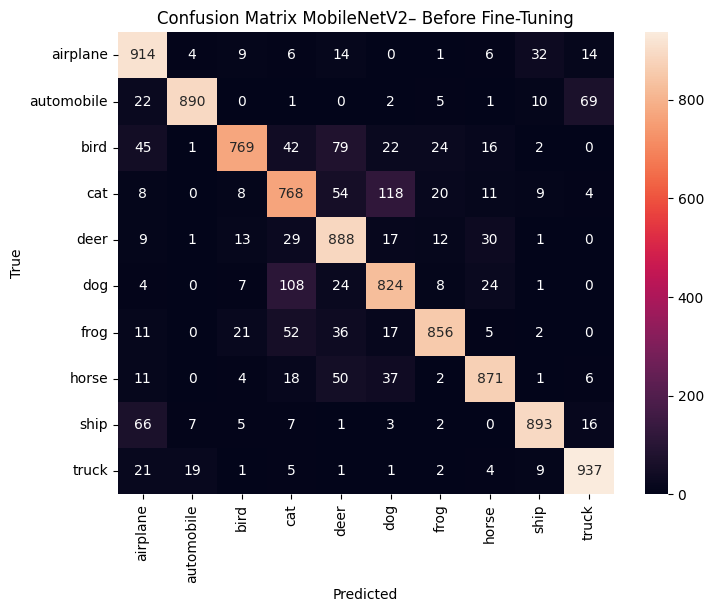

In [21]:
# Predict & confusion matrix
# Compute confusion matrix
cm_mob = confusion_matrix(y_true_test, y_pred_mob_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm_mob, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix MobileNetV2– Before Fine-Tuning')
plt.show()

##### Fine tune

In [22]:
# Unfreeze the last N layers of MobileNetV2
fine_tune_at = 100

base_model.trainable = True

# Freeze all layers before `fine_tune_at`
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [23]:
model_Mobile.compile(
    optimizer=Adam(learning_rate=1e-5),  # Smaller LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
fine_tune_epochs = 10

history_finetune = model_Mobile.fit(
    train_dataset,
    epochs=EPOCHS + fine_tune_epochs,
    initial_epoch=EPOCHS,  # continue from previous training
    validation_data=test_dataset,
    callbacks=callbacks
)

Epoch 21/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 103s 18ms/step - accuracy: 0.7904 - loss: 0.6815 - val_accuracy: 0.8672 - val_loss: 0.3924 - learning_rate: 1.0000e-05
Epoch 22/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.8537 - loss: 0.4295 - val_accuracy: 0.8894 - val_loss: 0.3439 - learning_rate: 1.0000e-05
Epoch 23/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.8808 - loss: 0.3421 - val_accuracy: 0.8933 - val_loss: 0.3216 - learning_rate: 1.0000e-05
Epoch 24/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9000 - loss: 0.2942 - val_accuracy: 0.8978 - val_loss: 0.3071 - learning_rate: 1.0000e-05
Epoch 25/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9152 - loss: 0.2486 - val_accuracy: 0.9043 - val_loss: 0.2963 - learning_rate: 1.0000e-05
Epoch 26/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.9225 - loss: 0.2198 - val_accuracy: 0.9044 - val_loss: 0.2931 - learning_rate: 1.0000e-05
Epoch 27/30
3125/3125 ━━━━━━━━━━━

Evaluation

In [25]:
# Predict class probabilities using the fine-tuned model
y_pred_probs_ft_mob_test = model_Mobile.predict(test_dataset)
y_pred_probs_ft_mob_train = model_Mobile.predict(eval_train_dataset)

# Convert probabilities to class predictions
y_pred_ft_mob_test = y_pred_probs_ft_mob_test.argmax(axis=1)
y_pred_ft_mob_train = y_pred_probs_ft_mob_train.argmax(axis=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step


In [26]:
# Convert one-hot labels back to integers
y_true_test = np.concatenate([y for x, y in test_dataset], axis=0)
y_true_test = tf.argmax(y_true_test, axis=1).numpy()

y_true_train = np.concatenate([y for x, y in eval_train_dataset], axis=0)
y_true_train = tf.argmax(y_true_train, axis=1).numpy()

In [27]:
acc_ft_mob_test = accuracy_score(y_true_test, y_pred_ft_mob_test)
prec_ft_mob_test = precision_score(y_true_test, y_pred_ft_mob_test, average='weighted')
rec_ft_mob_test = recall_score(y_true_test, y_pred_ft_mob_test, average='weighted')
f1_ft_mob_test = f1_score(y_true_test, y_pred_ft_mob_test, average='weighted')

print("Metrics after Fine-Tuning with test dataset:")
print(f"Accuracy:  {acc_ft_mob_test:.4f}")
print(f"Precision: {prec_ft_mob_test:.4f}")
print(f"Recall:    {rec_ft_mob_test:.4f}")
print(f"F1 Score:  {f1_ft_mob_test:.4f}")

acc_ft_mob_train = accuracy_score(y_true_train, y_pred_ft_mob_train)
prec_ft_mob_train = precision_score(y_true_train, y_pred_ft_mob_train, average='weighted')
rec_ft_mob_train = recall_score(y_true_train, y_pred_ft_mob_train, average='weighted')
f1_ft_mob_train = f1_score(y_true_train, y_pred_ft_mob_train, average='weighted')

print("\nMetrics after Fine-Tuning with train dataset:")
print(f"Accuracy:  {acc_ft_mob_train:.4f}")
print(f"Precision: {prec_ft_mob_train:.4f}")
print(f"Recall:    {rec_ft_mob_train:.4f}")
print(f"F1 Score:  {f1_ft_mob_train:.4f}")

Metrics after Fine-Tuning with test dataset:
Accuracy:  0.9088
Precision: 0.9091
Recall:    0.9088
F1 Score:  0.9088

Metrics after Fine-Tuning with train dataset:
Accuracy:  0.9881
Precision: 0.9881
Recall:    0.9881
F1 Score:  0.9881


In [28]:
report_ft_mob_test = classification_report(y_true_test, y_pred_ft_mob_test, target_names=class_names)
print(report_ft_mob_test)

              precision    recall  f1-score   support

    airplane       0.91      0.93      0.92      1000
  automobile       0.96      0.94      0.95      1000
        bird       0.92      0.90      0.91      1000
         cat       0.81      0.83      0.82      1000
        deer       0.89      0.89      0.89      1000
         dog       0.87      0.84      0.85      1000
        frog       0.94      0.94      0.94      1000
       horse       0.92      0.93      0.92      1000
        ship       0.94      0.95      0.95      1000
       truck       0.93      0.94      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



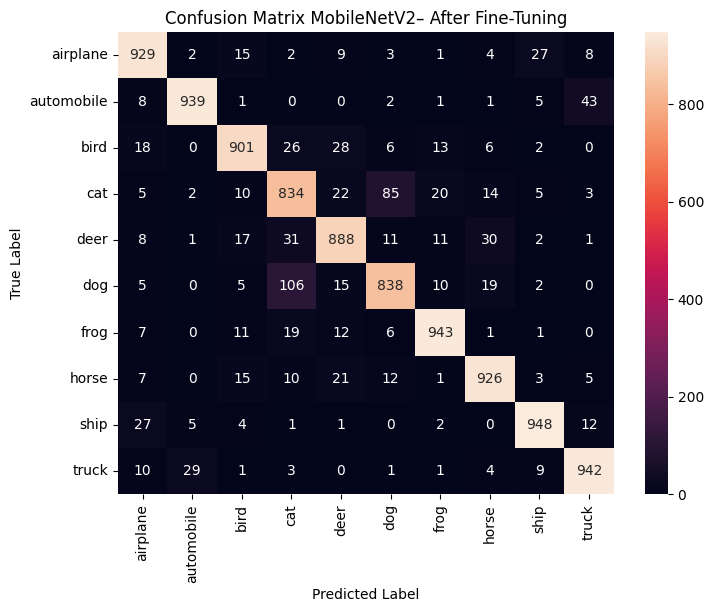

In [29]:
cm_ft = confusion_matrix(y_true_test, y_pred_ft_mob_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ft, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix MobileNetV2– After Fine-Tuning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Fine tune 2

In [30]:
fine_tune_at = 90

base_model.trainable = True

# Freeze all layers before `fine_tune_at`
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [31]:
model_Mobile.compile(
    optimizer=Adam(learning_rate=1e-5),  # Smaller LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
fine_tune_epochs = 15

history_finetune = model_Mobile.fit(
    train_dataset,
    epochs=EPOCHS + fine_tune_epochs,
    initial_epoch=EPOCHS,  # continue from previous training
    validation_data=test_dataset,
    callbacks=callbacks
)

Epoch 21/35
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 100s 17ms/step - accuracy: 0.9490 - loss: 0.1459 - val_accuracy: 0.9084 - val_loss: 0.2954 - learning_rate: 1.0000e-05
Epoch 22/35
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9555 - loss: 0.1322 - val_accuracy: 0.9095 - val_loss: 0.2914 - learning_rate: 1.0000e-05
Epoch 23/35
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9620 - loss: 0.1114 - val_accuracy: 0.9077 - val_loss: 0.2927 - learning_rate: 1.0000e-05
Epoch 24/35
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9663 - loss: 0.0974
Epoch 24: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9663 - loss: 0.0974 - val_accuracy: 0.9094 - val_loss: 0.2992 - learning_rate: 1.0000e-05
Epoch 25/35
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9704 - loss: 0.0890 - val_accuracy: 0.9113 - val_loss: 0.3015 - learning_rate: 5.0000e-06


Evaluation

In [33]:
# Predict class probabilities using the fine-tuned model
y_pred_probs_ft_mob_test = model_Mobile.predict(test_dataset)
y_pred_probs_ft_mob_train = model_Mobile.predict(eval_train_dataset)

# Convert probabilities to class predictions
y_pred_ft_mob_test = y_pred_probs_ft_mob_test.argmax(axis=1)
y_pred_ft_mob_train = y_pred_probs_ft_mob_train.argmax(axis=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step


In [34]:
# Convert one-hot labels back to integers
y_true_test = np.concatenate([y for x, y in test_dataset], axis=0)
y_true_test = tf.argmax(y_true_test, axis=1).numpy()

y_true_train = np.concatenate([y for x, y in eval_train_dataset], axis=0)
y_true_train = tf.argmax(y_true_train, axis=1).numpy()

In [35]:
acc_ft_mob_test = accuracy_score(y_true_test, y_pred_ft_mob_test)
prec_ft_mob_test = precision_score(y_true_test, y_pred_ft_mob_test, average='weighted')
rec_ft_mob_test = recall_score(y_true_test, y_pred_ft_mob_test, average='weighted')
f1_ft_mob_test = f1_score(y_true_test, y_pred_ft_mob_test, average='weighted')

print("Metrics after Fine-Tuning with test dataset:")
print(f"Accuracy:  {acc_ft_mob_test:.4f}")
print(f"Precision: {prec_ft_mob_test:.4f}")
print(f"Recall:    {rec_ft_mob_test:.4f}")
print(f"F1 Score:  {f1_ft_mob_test:.4f}")

acc_ft_mob_train = accuracy_score(y_true_train, y_pred_ft_mob_train)
prec_ft_mob_train = precision_score(y_true_train, y_pred_ft_mob_train, average='weighted')
rec_ft_mob_train = recall_score(y_true_train, y_pred_ft_mob_train, average='weighted')
f1_ft_mob_train = f1_score(y_true_train, y_pred_ft_mob_train, average='weighted')

print("\nMetrics after Fine-Tuning with train dataset:")
print(f"Accuracy:  {acc_ft_mob_train:.4f}")
print(f"Precision: {prec_ft_mob_train:.4f}")
print(f"Recall:    {rec_ft_mob_train:.4f}")
print(f"F1 Score:  {f1_ft_mob_train:.4f}")

Metrics after Fine-Tuning with test dataset:
Accuracy:  0.9095
Precision: 0.9094
Recall:    0.9095
F1 Score:  0.9094

Metrics after Fine-Tuning with train dataset:
Accuracy:  0.9942
Precision: 0.9942
Recall:    0.9942
F1 Score:  0.9942


In [36]:
report_ft_mob_test = classification_report(y_true_test, y_pred_ft_mob_test, target_names=class_names)
print(report_ft_mob_test)

              precision    recall  f1-score   support

    airplane       0.92      0.91      0.92      1000
  automobile       0.95      0.95      0.95      1000
        bird       0.92      0.91      0.91      1000
         cat       0.83      0.81      0.82      1000
        deer       0.89      0.90      0.89      1000
         dog       0.85      0.86      0.85      1000
        frog       0.93      0.95      0.94      1000
       horse       0.94      0.92      0.93      1000
        ship       0.94      0.95      0.94      1000
       truck       0.93      0.94      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



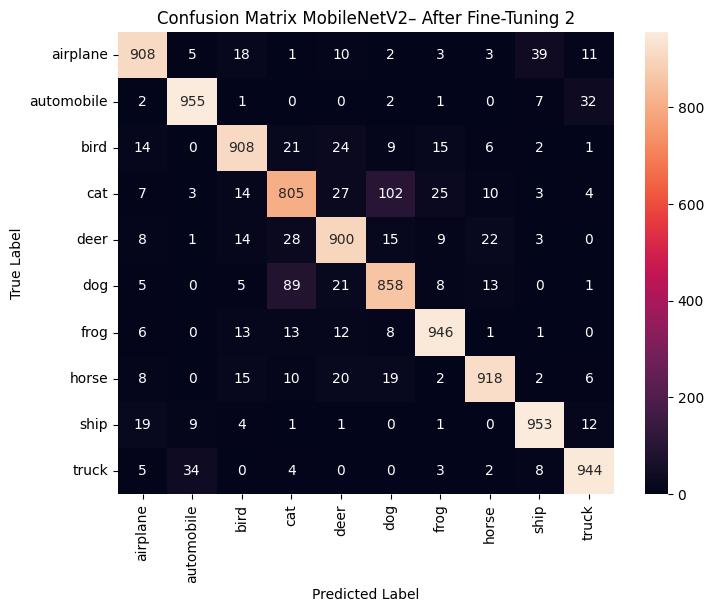

In [37]:
cm_ft = confusion_matrix(y_true_test, y_pred_ft_mob_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ft, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix MobileNetV2– After Fine-Tuning 2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()